In [44]:

import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from config import weather_api_key
from citipy import citipy
import csv

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

essing Record 26 of Set 4 | bratsk
Processing Record 27 of Set 4 | port alfred
Processing Record 28 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 29 of Set 4 | mar del plata
Processing Record 30 of Set 4 | fukue
Processing Record 31 of Set 4 | salinas
Processing Record 32 of Set 4 | butaritari
Processing Record 33 of Set 4 | flinders
Processing Record 34 of Set 4 | fortuna
Processing Record 35 of Set 4 | nurota
Processing Record 36 of Set 4 | georgetown
Processing Record 37 of Set 4 | puro
Processing Record 38 of Set 4 | kobojango
City not found. Skipping...
Processing Record 39 of Set 4 | alcazar de san juan
Processing Record 40 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 4 | sitka
Processing Record 42 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 43 of Set 4 | ajdabiya
Processing Record 44 of Set 4 | saldanha
Processing Record 45 of Set 4 | lata
Processing Record 46 of Set 4 | la ronge
Processing Record 47

In [26]:
len(city_data)

586

In [28]:
df=pd.DataFrame(city_data)

In [29]:
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dwarka,22.2394,68.9678,83.10,83,100,16.44,IN,2021-05-30 18:33:23
1,Hilo,19.7297,-155.0900,86.29,75,40,5.75,US,2021-05-30 18:33:23
2,Key West,24.5557,-81.7826,84.99,68,40,8.05,US,2021-05-30 18:31:26
3,Misratah,32.3754,15.0925,72.32,68,5,9.95,LY,2021-05-30 18:33:24
4,Brae,60.3964,-1.3530,48.11,87,9,11.48,GB,2021-05-30 18:33:24
...,...,...,...,...,...,...,...,...,...
581,Sabang,5.8933,95.3214,83.59,71,100,17.45,ID,2021-05-30 18:37:10
582,Sanlucar La Mayor,37.3871,-6.2011,86.41,42,100,5.01,ES,2021-05-30 18:37:10
583,Galle,6.0367,80.2170,80.28,85,82,16.17,LK,2021-05-30 18:37:10
584,Kuruman,-27.4524,23.4325,47.98,31,100,3.31,ZA,2021-05-30 18:37:11


In [36]:
new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']


In [40]:
city_data_df=df[new_column_order]

In [41]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dwarka,IN,2021-05-30 18:33:23,22.2394,68.9678,83.10,83,100,16.44
1,Hilo,US,2021-05-30 18:33:23,19.7297,-155.0900,86.29,75,40,5.75
2,Key West,US,2021-05-30 18:31:26,24.5557,-81.7826,84.99,68,40,8.05
3,Misratah,LY,2021-05-30 18:33:24,32.3754,15.0925,72.32,68,5,9.95
4,Brae,GB,2021-05-30 18:33:24,60.3964,-1.3530,48.11,87,9,11.48
...,...,...,...,...,...,...,...,...,...
581,Sabang,ID,2021-05-30 18:37:10,5.8933,95.3214,83.59,71,100,17.45
582,Sanlucar La Mayor,ES,2021-05-30 18:37:10,37.3871,-6.2011,86.41,42,100,5.01
583,Galle,LK,2021-05-30 18:37:10,6.0367,80.2170,80.28,85,82,16.17
584,Kuruman,ZA,2021-05-30 18:37:11,-27.4524,23.4325,47.98,31,100,3.31


In [46]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [47]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

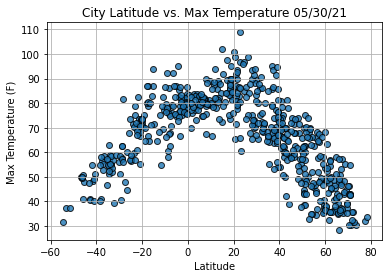

In [48]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

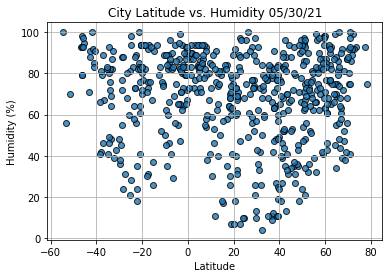

In [49]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

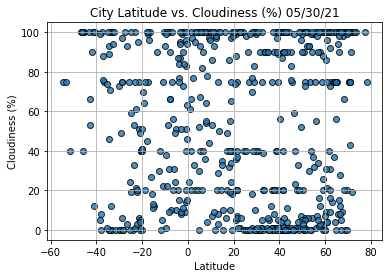

In [50]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

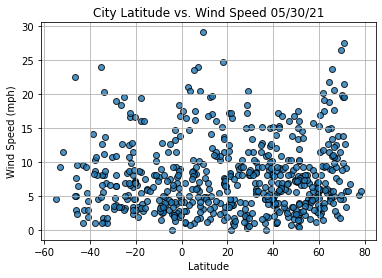

In [51]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()